In [ ]:
!pip install pyts

# Import library and data

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20.27,10)})
import tensorflow as tf

In [ ]:
from google.colab import drive

In [ ]:
#import data
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('gdrive/My Drive/MBKM/gladius_v3.csv')

In [ ]:
df.reset_index(inplace = True)

In [ ]:
def late(x):
  if x == 0:
    return 'UNPAID'
  elif (x >= 1) & (x<21):
    return 'PAID'
  else:
    return 'LATE PAID'

for i in range(11, 0, -1):
  df[f'month_{i}_late'] = df['billing_{}_paymentDay'.format(i)].apply(lambda x : late(x))

In [ ]:
df

,index,Unnamed: 0,_id,billing_11_amountTotal,billing_11_channel,billing_11_currency,billing_11_isInstallment,billing_11_paymentDate,billing_11_paymentDay,billing_11_paymentTime,billing_11_period,billing_11_period_index,billing_11_status,billing_10_amountTotal,billing_10_channel,billing_10_currency,billing_10_isInstallment,billing_10_paymentDate,billing_10_paymentDay,billing_10_paymentTime,billing_10_period,billing_10_period_index,billing_10_status,billing_9_amountTotal,billing_9_channel,billing_9_currency,billing_9_isInstallment,billing_9_paymentDate,billing_9_paymentDay,billing_9_paymentTime,billing_9_period,billing_9_period_index,billing_9_status,billing_8_amountTotal,billing_8_channel,billing_8_currency,billing_8_isInstallment,billing_8_paymentDate,billing_8_paymentDay,billing_8_paymentTime,billing_8_period,billing_8_period_index,billing_8_status,billing_7_amountTotal,billing_7_channel,billing_7_currency,billing_7_isInstallment,billing_7_paymentDate,billing_7_paymentDay,billing_7_paymentTime,billing_7_period,billing_7_period_index,billing_7_status,billing_6_amountTotal,billing_6_channel,billing_6_currency,billing_6_isInstallment,billing_6_paymentDate,billing_6_paymentDay,billing_6_paymentTime,billing_6_period,billing_6_period_index,billing_6_status,billing_5_amountTotal,billing_5_channel,billing_5_currency,billing_5_isInstallment,billing_5_paymentDate,billing_5_paymentDay,billing_5_paymentTime,billing_5_period,billing_5_period_index,billing_5_status,billing_4_amountTotal,billing_4_channel,billing_4_currency,billing_4_isInstallment,billing_4_paymentDate,billing_4_paymentDay,billing_4_paymentTime,billing_4_period,billing_4_period_index,billing_4_status,billing_3_amountTotal,billing_3_channel,billing_3_currency,billing_3_isInstallment,billing_3_paymentDate,billing_3_paymentDay,billing_3_paymentTime,billing_3_period,billing_3_period_index,billing_3_status,billing_2_amountTotal,billing_2_channel,billing_2_currency,billing_2_isInstallment,billing_2_outstandingAmount,billing_2_paymentDate,billing_2_paymentDay,billing_2_paymentTime,billing_2_period,billing_2_period_index,billing_2_status,billing_1_amountTotal,billing_1_channel,billing_1_currency,billing_1_isInstallment,billing_1_outstandingAmount,billing_1_paymentDate,billing_1_paymentDay,billing_1_paymentTime,billing_1_period,billing_1_period_index,billing_1_status,gladius,gladius.nd,gladius.paketradius,gladius.portbinding,gladius.realm,gladius.statusnomor,gladius.statusport,last_connection_days,number,package,quota,samnas.end_date,samnas.service_name,samnas.start_date,session_start,sisa,usage,usage_download,usage_upload,late_count,mean_amountTotal,month_11_late,month_10_late,month_9_late,month_8_late,month_7_late,month_6_late,month_5_late,month_4_late,month_3_late,month_2_late,month_1_late
0,0,0,617fc8959da5e900114047e8,344000.0,FINNET BANK - BANK CENTRAL ASIA,IDR,Bukan Cicilan,20201217,17,164344.0,202012.0,11.0,PAID,341000.0,FINNET BANK - BANK CENTRAL ASIA,IDR,Bukan Cicilan,20210115,15,112813.0,202101.0,10.0,PAID,341000.0,FINNET BANK - BANK CENTRAL ASIA,IDR,Bukan Cicilan,20210216,16,161843.0,202102.0,9.0,PAID,341000.0,FINNET BANK - BANK CENTRAL ASIA,IDR,Bukan Cicilan,20210316,16,161636.0,202103.0,8.0,PAID,341000.0,FINNET BANK - BANK CENTRAL ASIA,IDR,Bukan Cicilan,20210416,16,91139.0,202104.0,7.0,PAID,341000.0,FINNET BANK - BANK CENTRAL ASIA,IDR,Bukan Cicilan,20210517,17,162151.0,202105.0,6.0,PAID,341000.0,FINNET BANK - BANK CENTRAL ASIA,IDR,Bukan Cicilan,20210618,18,113136.0,202106.0,5.0,PAID,341000.0,FINNET BANK - BANK CENTRAL ASIA,IDR,Bukan Cicilan,20210713,13,104622.0,202107.0,4.0,PAID,341000.0,FINNET BANK - BANK CENTRAL ASIA,IDR,Bukan Cicilan,20210819,19,105030.0,202108.0,3.0,PAID,341000.0,FINNET BANK - BANK CENTRAL ASIA,IDR,Bukan Cicilan,NaN,20211018,18,155946.0,202109.0,2.0,PAID,341000.0,FINNET BANK - BANK CENTRAL ASIA,IDR,Bukan Cicilan,NaN,20211018,18,155946.0,202110.0,1.0,PAID,NaN,1.311770e+11,INETNLOY10,GPON10-D3-RJW-2 xpon 0/7/0/13:6.3.200,telkom.net,enable,enable,0,1.

In [ ]:
df['billing_3_paymentDay'].value_counts().sort_index()

0       428
1      1817
2      1456
3      1553
4      1381
5      1228
6      1302
7      1062
8      1126
9      1954
10     2546
11     1240
12     1265
13     1332
14     1178
15     1029
16     1788
17     1318
18     2608
19     5446
20     9375
21    10379
22    13011
23     7772
24     4948
25     4338
26     3229
27     2608
28     1828
29     1115
30     1815
31     2061
Name: billing_3_paymentDay, dtype: int64

# modeling

In [ ]:
sample_df = df.groupby('month_1_late').sample(n=3000, random_state=1)
sample_df

,index,Unnamed: 0,_id,billing_11_amountTotal,billing_11_channel,billing_11_currency,billing_11_isInstallment,billing_11_paymentDate,billing_11_paymentDay,billing_11_paymentTime,billing_11_period,billing_11_period_index,billing_11_status,billing_10_amountTotal,billing_10_channel,billing_10_currency,billing_10_isInstallment,billing_10_paymentDate,billing_10_paymentDay,billing_10_paymentTime,billing_10_period,billing_10_period_index,billing_10_status,billing_9_amountTotal,billing_9_channel,billing_9_currency,billing_9_isInstallment,billing_9_paymentDate,billing_9_paymentDay,billing_9_paymentTime,billing_9_period,billing_9_period_index,billing_9_status,billing_8_amountTotal,billing_8_channel,billing_8_currency,billing_8_isInstallment,billing_8_paymentDate,billing_8_paymentDay,billing_8_paymentTime,billing_8_period,billing_8_period_index,billing_8_status,billing_7_amountTotal,billing_7_channel,billing_7_currency,billing_7_isInstallment,billing_7_paymentDate,billing_7_paymentDay,billing_7_paymentTime,billing_7_period,billing_7_period_index,billing_7_status,billing_6_amountTotal,billing_6_channel,billing_6_currency,billing_6_isInstallment,billing_6_paymentDate,billing_6_paymentDay,billing_6_paymentTime,billing_6_period,billing_6_period_index,billing_6_status,billing_5_amountTotal,billing_5_channel,billing_5_currency,billing_5_isInstallment,billing_5_paymentDate,billing_5_paymentDay,billing_5_paymentTime,billing_5_period,billing_5_period_index,billing_5_status,billing_4_amountTotal,billing_4_channel,billing_4_currency,billing_4_isInstallment,billing_4_paymentDate,billing_4_paymentDay,billing_4_paymentTime,billing_4_period,billing_4_period_index,billing_4_status,billing_3_amountTotal,billing_3_channel,billing_3_currency,billing_3_isInstallment,billing_3_paymentDate,billing_3_paymentDay,billing_3_paymentTime,billing_3_period,billing_3_period_index,billing_3_status,billing_2_amountTotal,billing_2_channel,billing_2_currency,billing_2_isInstallment,billing_2_outstandingAmount,billing_2_paymentDate,billing_2_paymentDay,billing_2_paymentTime,billing_2_period,billing_2_period_index,billing_2_status,billing_1_amountTotal,billing_1_channel,billing_1_currency,billing_1_isInstallment,billing_1_outstandingAmount,billing_1_paymentDate,billing_1_paymentDay,billing_1_paymentTime,billing_1_period,billing_1_period_index,billing_1_status,gladius,gladius.nd,gladius.paketradius,gladius.portbinding,gladius.realm,gladius.statusnomor,gladius.statusport,last_connection_days,number,package,quota,samnas.end_date,samnas.service_name,samnas.start_date,session_start,sisa,usage,usage_download,usage_upload,late_count,mean_amountTotal,month_11_late,month_10_late,month_9_late,month_8_late,month_7_late,month_6_late,month_5_late,month_4_late,month_3_late,month_2_late,month_1_late
37022,37022,38145,617ff9a39da5e9001140dce9,300000.0,FINNET SUBCA - ALFAMART,IDR,Bukan Cicilan,20210126,26,192906.0,202012.0,11.0,PAID,287500.0,FINNET SUBCA - ALFAMART,IDR,Bukan Cicilan,20210126,26,192906.0,202101.0,10.0,PAID,58225.0,FINNET SUBCA - ALFAMART,IDR,Bukan Cicilan,20210221,21,83121.0,202102.0,9.0,PAID,287500.0,FINNET SUBCA - ALFAMART,IDR,Bukan Cicilan,20210323,23,162013.0,202103.0,8.0,PAID,287500.0,FINNET SUBCA - INDOMART,IDR,Bukan Cicilan,20210425,25,105237.0,202104.0,7.0,PAID,275000.0,FINNET SUBCA - ALFAMART,IDR,Bukan Cicilan,20210520,20,191139.0,202105.0,6.0,PAID,287500.0,FINNET SUBCA - ALFAMART,IDR,Bukan Cicilan,20210621,21,102457.0,202106.0,5.0,PAID,287500.0,FINNET SUBCA - ALFAMART,IDR,Bukan Cicilan,20210725,25,103526.0,202107.0,4.0,PAID,287500.0,FINNET SUBCA - ALFAMART,IDR,Bukan Cicilan,20210825,25,110140.0,202108.0,3.0,PAID,275000.0,FINNET SUBCA - ALFAMART,IDR,Bukan Cicilan,NaN,20211028,28,201937.0,202109.0,2.0,PAID,287500.0,FINNET SUBCA - ALFAMART,IDR,Bukan Cicilan,NaN,20211028,28,201937.0,202110.0,1.0,PAID,NaN,1.312390e+11,INETF10M,GPON03-D3-KNG-2 xpon 0/2/0/10:9.3.200,telkom.net,enable,enable,0,1.312390e+11,INETF10M,350.0,-,-,-,01-11-21 00:49,350.00,0.00,1.17 GB,205.87 MB,10

In [ ]:
amount = ['billing_{}_amountTotal'.format(i) for i in range(2,12)]
channel = ['billing_{}_channel'.format(i) for i in range (2,12)]
payDay = ['billing_{}_paymentDay'.format(i) for i in range (2,12)]
late = ['month_{}_late'.format(i) for i in range (1,12)]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
col_used2 = amount + channel + payDay + late
col_used2.append('gladius.paketradius')
col_used2.append('usage')

In [ ]:
df_model = sample_df[col_used2].loc[df['month_1_late'] != 'UNPAID']
df_model.head(10)

,billing_2_amountTotal,billing_3_amountTotal,billing_4_amountTotal,billing_5_amountTotal,billing_6_amountTotal,billing_7_amountTotal,billing_8_amountTotal,billing_9_amountTotal,billing_10_amountTotal,billing_11_amountTotal,billing_2_channel,billing_3_channel,billing_4_channel,billing_5_channel,billing_6_channel,billing_7_channel,billing_8_channel,billing_9_channel,billing_10_channel,billing_11_channel,billing_2_paymentDay,billing_3_paymentDay,billing_4_paymentDay,billing_5_paymentDay,billing_6_paymentDay,billing_7_paymentDay,billing_8_paymentDay,billing_9_paymentDay,billing_10_paymentDay,billing_11_paymentDay,month_1_late,month_2_late,month_3_late,month_4_late,month_5_late,month_6_late,month_7_late,month_8_late,month_9_late,month_10_late,month_11_late,gladius.paketradius,usage
37022,275000.0,287500.0,287500.0,287500.0,275000.0,287500.0,287500.0,58225.0,287500.0,300000.0,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,FINNET SUBCA - INDOMART,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,28,25,25,21,20,25,23,21,26,26,LATE PAID,LATE PAID,LATE PAID,LATE PAID,LATE PAID,PAID,LATE PAID,LATE PAID,LATE PAID,LATE PAID,LATE PAID,INETF10M,0.00
95336,258500.0,258500.0,270250.0,258500.0,258500.0,165000.0,235000.0,0.0,0.0,0.0,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,-,-,-,12,21,21,18,19,12,29,0,0,0,LATE PAID,PAID,LATE PAID,LATE PAID,PAID,PAID,PAID,LATE PAID,UNPAID,UNPAID,UNPAID,INETF20M,5.01
71577,347600.0,26219.0,30000.0,328900.0,358800.0,343850.0,343850.0,343850.0,343850.0,331900.0,[4N2]PLASA TANTULAR SMG,FINNET SUBCA - INDOMART,FINNET SUBCA - INDOMART,FINNET SUBCA - INDOMART,[4N2]PLASA TANTULAR SMG,FINNET SUBCA - INDOMART,FINNET SUBCA - INDOMART,FINNET SUBCA - INDOMART,FINNET SUBCA - INDOMART,FINNET SUBCA - ALFAMART,27,28,30,30,9,28,23,21,21,21,LATE PAID,LATE PAID,LATE PAID,LATE PAID,LATE PAID,PAID,LATE PAID,LATE PAID,LATE PAID,LATE PAID,LATE PAID,INETF10M,0.00
88860,346500.0,362250.0,362250.0,362250.0,362250.0,346500.0,306233.0,315000.0,0.0,0.0,FINNET BANK - BANK NEGARA INDONESIA,FINNET SUBCA - MAGNA KARSA MULIA,FINNET BANK - BANK NEGARA INDONESIA,FINNET SUBCA - ALFAMART,FINNET BANK - BANK NEGARA INDONESIA,FINNET BANK - BANK NEGARA INDONESIA,FINNET SUBCA - ALFAMART,FINNET SUBCA - ALFAMART,-,-,30,22,27,21,25,20,13,20,0,0,LATE PAID,LATE PAID,LATE PAID,LATE PAID,LATE PAID,LATE PAID,PAID,PAID,PAID,UNPAID,UNPAID,INETF20M,21.43
11757,368500.0,385250.0,385250.0,385250.0,385250.0,385250.0,385250.0,368500.0,385250.0,388250.0,SOPP9015PAP,FINNET BANK - BANK RAKYAT INDONESIA,FINNET BANK - BANK RAKYAT INDONESIA,FINNET BANK - BANK CENTRAL ASIA,FINNET BANK - BANK RAKYAT INDONESIA,FINNET BANK - BANK CENTRAL ASIA,FINNET BANK - BANK CENTRAL ASIA,FINNET BANK - BANK CENTRAL ASIA,FINNET BANK - PT POS INDONESIA,FINNET BANK - BANK CENTRAL ASIA,6,27,29,24,24,25,21,20,28,24,LATE PAID,PAID,LATE PAID,LATE PAID,LATE PAID,LATE PAID,LATE PAID,LATE PAID,PAID,LATE PAID,LATE PAID,INETNLOY20,0.00
80861,286000.0,312000.0,299000.0,299000.0,299000.0,286000.0,286000.0,463339.0,260000.0,0.0,LOKET UBC AREA-2 JAKUT-1,FINNET SUBCA - TOKOPEDIA,FINNET SUBCA - TOKOPEDIA,FINNET SUBCA - TOKOPEDIA,FINNET SUBCA - TOKOPEDIA,FINNET SUBCA - TOKOPEDIA,FINNET BANK - BANK NEGARA INDONESIA,FINNET SUBCA - TOKOPEDIA,FINNET SUBCA - INDOMART,-,8,1,21,23,21,20,20,23,2,0,LATE PAID,PAID,PAID,LATE PAID,LATE PAID,LATE PAID,PAID,PAID,LATE PAID,PAID,UNPAID,INETNLOY20,6.98
33470,308000.0,336000.0,322000.0,322000.0,322000.0,322000.0,308000.0,336000.0,322000.0,325000.0,FPC - FINNET KOPEGTEL,FPC - FINNET KOPEGTEL,FPC - FINNET KOPEGTEL,FINNET BANK - BANK RAKYAT INDONESIA,FINNET SUBCA - BIMASAKTI,FINNET SUBCA - BIMASAKTI,FPC - FINNET KOPEGTEL,FPC - FINNET KOPEGTEL,FPC - FINNET KOPEGTEL,FINNET SUBCA - MAGNA KARSA MULIA,5,3,22,21,27,24,8,8,25,22,LATE PAID,PAID,PAID,L

In [ ]:
#code categorical data
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for column in channel:
  df_model[column] = label.fit_transform(df_model[column])
channel_class = list(label.classes_)

for column in late:
  df_model[column] = label.fit_transform(df_model[column])
late_class = list(label.classes_)

df_model['gladius.paketradius'] = label.fit_transform(df_model['gladius.paketradius'])
paket_class = list(label.classes_)

In [ ]:
df_model.head(10)

,billing_2_amountTotal,billing_3_amountTotal,billing_4_amountTotal,billing_5_amountTotal,billing_6_amountTotal,billing_7_amountTotal,billing_8_amountTotal,billing_9_amountTotal,billing_10_amountTotal,billing_11_amountTotal,billing_2_channel,billing_3_channel,billing_4_channel,billing_5_channel,billing_6_channel,billing_7_channel,billing_8_channel,billing_9_channel,billing_10_channel,billing_11_channel,billing_2_paymentDay,billing_3_paymentDay,billing_4_paymentDay,billing_5_paymentDay,billing_6_paymentDay,billing_7_paymentDay,billing_8_paymentDay,billing_9_paymentDay,billing_10_paymentDay,billing_11_paymentDay,month_1_late,month_2_late,month_3_late,month_4_late,month_5_late,month_6_late,month_7_late,month_8_late,month_9_late,month_10_late,month_11_late,gladius.paketradius,usage
37022,275000.0,287500.0,287500.0,287500.0,275000.0,287500.0,287500.0,58225.0,287500.0,300000.0,104,63,58,50,53,55,51,54,50,43,28,25,25,21,20,25,23,21,26,26,0,0,0,0,0,1,0,0,0,0,0,11,0.00
95336,258500.0,258500.0,270250.0,258500.0,258500.0,165000.0,235000.0,0.0,0.0,0.0,104,63,58,50,53,49,51,0,0,0,12,21,21,18,19,12,29,0,0,0,0,1,0,0,1,1,1,0,2,2,2,12,5.01
71577,347600.0,26219.0,30000.0,328900.0,358800.0,343850.0,343850.0,343850.0,343850.0,331900.0,324,68,64,55,164,55,57,61,56,43,27,28,30,30,9,28,23,21,21,21,0,0,0,0,0,1,0,0,0,0,0,11,0.00
88860,346500.0,362250.0,362250.0,362250.0,362250.0,346500.0,306233.0,315000.0,0.0,0.0,84,69,35,50,31,27,51,54,0,0,30,22,27,21,25,20,13,20,0,0,0,0,0,0,0,0,1,1,1,2,2,12,21.43
11757,368500.0,385250.0,385250.0,385250.0,385250.0,385250.0,385250.0,368500.0,385250.0,388250.0,283,46,40,18,36,17,21,24,49,15,6,27,29,24,24,25,21,20,28,24,0,1,0,0,0,0,0,0,1,0,0,33,0.00
80861,286000.0,312000.0,299000.0,299000.0,299000.0,286000.0,286000.0,463339.0,260000.0,0.0,171,75,71,62,64,61,31,67,56,0,8,1,21,23,21,20,20,23,2,0,0,1,1,0,0,0,1,1,0,1,2,33,6.98
33470,308000.0,336000.0,322000.0,322000.0,322000.0,322000.0,308000.0,336000.0,322000.0,325000.0,120,79,75,32,55,52,67,70,66,50,5,3,22,21,27,24,8,8,25,22,0,1,1,0,0,0,0,1,1,0,0,11,15.68
33692,236500.0,247250.0,247250.0,247250.0,247250.0,247250.0,247250.0,247250.0,247250.0,247250.0,109,77,57,64,58,49,51,54,50,43,29,22,21,21,22,26,25,25,25,29,0,0,0,0,0,0,0,0,0,0,0,40,1.56
2814,70070.0,75070.0,38048.0,36570.0,86570.0,31570.0,36570.0,31570.0,36570.0,37560.0,84,62,35,27,31,32,64,24,63,24,21,26,21,22,20,20,26,20,21,24,0,0,0,0,0,1,1,0,1,0,0,4,0.00
72704,346500.0,346500.0,362250.0,362250.0,346500.0,346500.0,362250.0,346500.0,27500.0,536002.0,120,36,30,22,68,64,51,61,56,49,29,21,27,28,22,22,23,5,9,9,0,0,0,0,0,0,0,0,1,1,1,12,9.16


In [ ]:
channel_class

['-',
 'BJM BLN CATEL BATULICIN',
 'BJM PLI PLS PLEIHARI',
 'Counter Desk Kancatel Samulaki',
 'DEPOSIT INDIHOME',
 'DIV ENTREPRISE SERVICE MANDIRI - DIVISI ENTERPRISE',
 'EDC BNI LOKET TUNGGAKAN PLASA RKT',
 'EDC MANDIRI KALIBATA',
 'FINNET BANK - ANJAK BANK BCA',
 'FINNET BANK - ANJAK BANK MEGA',
 'FINNET BANK - ANJAK CITIBANK',
 'FINNET BANK - ANZ PANIN BANK',
 'FINNET BANK - BANK BTN',
 'FINNET BANK - BANK BUANA INDONESIA',
 'FINNET BANK - BANK BUKOPIN',
 'FINNET BANK - BANK CENTRAL ASIA',
 'FINNET BANK - BANK DANAMON',
 'FINNET BANK - BANK EKONOMI',
 'FINNET BANK - BANK GANESHA',
 'FINNET BANK - BANK INTERNASIONAL INDONESIA',
 'FINNET BANK - BANK JATENG',
 'FINNET BANK - BANK MANDIRI',
 'FINNET BANK - BANK MUAMALAT INDONESIA',
 'FINNET BANK - BANK NAGARI',
 'FINNET BANK - BANK NEGARA INDONESIA',
 'FINNET BANK - BANK NIAGA',
 'FINNET BANK - BANK NISP',
 'FINNET BANK - BANK PERMATA',
 'FINNET BANK - BANK RAKYAT INDONESIA',
 'FINNET BANK - BANK RIAU KEPRI',
 'FINNET BANK - BANK SULUT

In [ ]:
late_class

['LATE PAID', 'PAID', 'UNPAID']

In [ ]:
paket_class

['-',
 'INET U1M',
 'INET U2M',
 'INET U512K',
 'INET10Q050',
 'INET10Q10',
 'INET10Q100',
 'INET10Q20',
 'INET10Q50',
 'INETBHOME',
 'INETF100M',
 'INETF10M',
 'INETF20M',
 'INETF30M',
 'INETF40M',
 'INETF50M',
 'INETFL10M',
 'INETFL20M',
 'INETFN10M',
 'INETFN20M',
 'INETFN30M',
 'INETHYBRID',
 'INETLOY10',
 'INETLOY20',
 'INETLOY200',
 'INETLOY30',
 'INETLOY300',
 'INETLOY40',
 'INETLOY50',
 'INETMBQ50',
 'INETMBSP10',
 'INETNLOY10',
 'INETNLOY100',
 'INETNLOY20',
 'INETNLOY200',
 'INETNLOY30',
 'INETNLOY300',
 'INETNLOY40',
 'INETNLOY50',
 'INETNLOYL10',
 'INETNLOYL20',
 'INETR10M',
 'INETR1M',
 'INETR2M',
 'INETR3M',
 'INETR512K',
 'INETR5M',
 'INETSSQ100',
 'INETSSQ20']

In [ ]:
X = df_model.drop('month_1_late', axis=1)
Y = df_model['month_1_late']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
from pyts.classification import TimeSeriesForest
model = TimeSeriesForest(n_estimators = 2000, random_state=43)
model.fit(x_train, y_train)

TimeSeriesForest(n_estimators=2000, random_state=43)

In [ ]:
y_pred = model.predict(x_test)

Training Accuracy : 1.0
Testing Accuracy : 0.8127777777777778


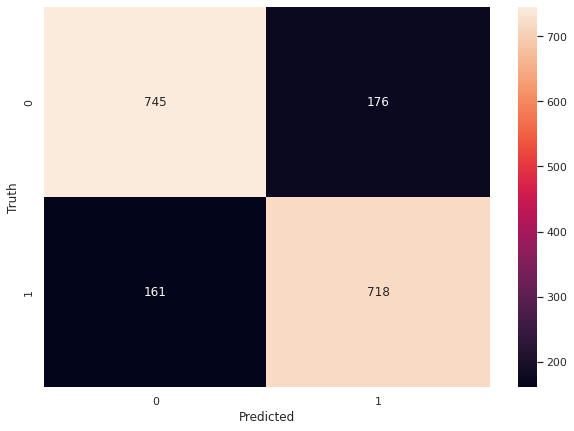


Classification report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       921
           1       0.80      0.82      0.81       879

    accuracy                           0.81      1800
   macro avg       0.81      0.81      0.81      1800
weighted avg       0.81      0.81      0.81      1800



In [ ]:
# evaluating the model
print('Training Accuracy :', model.score(x_train, y_train))
print('Testing Accuracy :', model.score(x_test, y_test))

# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
df_model.head(10)

,billing_2_amountTotal,billing_3_amountTotal,billing_4_amountTotal,billing_5_amountTotal,billing_6_amountTotal,billing_7_amountTotal,billing_8_amountTotal,billing_9_amountTotal,billing_10_amountTotal,billing_11_amountTotal,billing_2_channel,billing_3_channel,billing_4_channel,billing_5_channel,billing_6_channel,billing_7_channel,billing_8_channel,billing_9_channel,billing_10_channel,billing_11_channel,billing_2_paymentDay,billing_3_paymentDay,billing_4_paymentDay,billing_5_paymentDay,billing_6_paymentDay,billing_7_paymentDay,billing_8_paymentDay,billing_9_paymentDay,billing_10_paymentDay,billing_11_paymentDay,month_1_late,month_2_late,month_3_late,month_4_late,month_5_late,month_6_late,month_7_late,month_8_late,month_9_late,month_10_late,month_11_late,gladius.paketradius,usage
37022,275000.0,287500.0,287500.0,287500.0,275000.0,287500.0,287500.0,58225.0,287500.0,300000.0,104,63,58,50,53,55,51,54,50,43,28,25,25,21,20,25,23,21,26,26,0,0,0,0,0,1,0,0,0,0,0,11,0.00
95336,258500.0,258500.0,270250.0,258500.0,258500.0,165000.0,235000.0,0.0,0.0,0.0,104,63,58,50,53,49,51,0,0,0,12,21,21,18,19,12,29,0,0,0,0,1,0,0,1,1,1,0,2,2,2,12,5.01
71577,347600.0,26219.0,30000.0,328900.0,358800.0,343850.0,343850.0,343850.0,343850.0,331900.0,324,68,64,55,164,55,57,61,56,43,27,28,30,30,9,28,23,21,21,21,0,0,0,0,0,1,0,0,0,0,0,11,0.00
88860,346500.0,362250.0,362250.0,362250.0,362250.0,346500.0,306233.0,315000.0,0.0,0.0,84,69,35,50,31,27,51,54,0,0,30,22,27,21,25,20,13,20,0,0,0,0,0,0,0,0,1,1,1,2,2,12,21.43
11757,368500.0,385250.0,385250.0,385250.0,385250.0,385250.0,385250.0,368500.0,385250.0,388250.0,283,46,40,18,36,17,21,24,49,15,6,27,29,24,24,25,21,20,28,24,0,1,0,0,0,0,0,0,1,0,0,33,0.00
80861,286000.0,312000.0,299000.0,299000.0,299000.0,286000.0,286000.0,463339.0,260000.0,0.0,171,75,71,62,64,61,31,67,56,0,8,1,21,23,21,20,20,23,2,0,0,1,1,0,0,0,1,1,0,1,2,33,6.98
33470,308000.0,336000.0,322000.0,322000.0,322000.0,322000.0,308000.0,336000.0,322000.0,325000.0,120,79,75,32,55,52,67,70,66,50,5,3,22,21,27,24,8,8,25,22,0,1,1,0,0,0,0,1,1,0,0,11,15.68
33692,236500.0,247250.0,247250.0,247250.0,247250.0,247250.0,247250.0,247250.0,247250.0,247250.0,109,77,57,64,58,49,51,54,50,43,29,22,21,21,22,26,25,25,25,29,0,0,0,0,0,0,0,0,0,0,0,40,1.56
2814,70070.0,75070.0,38048.0,36570.0,86570.0,31570.0,36570.0,31570.0,36570.0,37560.0,84,62,35,27,31,32,64,24,63,24,21,26,21,22,20,20,26,20,21,24,0,0,0,0,0,1,1,0,1,0,0,4,0.00
72704,346500.0,346500.0,362250.0,362250.0,346500.0,346500.0,362250.0,346500.0,27500.0,536002.0,120,36,30,22,68,64,51,61,56,49,29,21,27,28,22,22,23,5,9,9,0,0,0,0,0,0,0,0,1,1,1,12,9.16


In [ ]:
model.feature_importances_

array([0.00426416, 0.00424859, 0.00423716, 0.00488909, 0.00916115,
       0.00936303, 0.01314751, 0.00855754, 0.0095923 , 0.00907122,
       0.00934569, 0.00972435, 0.00995753, 0.0093529 , 0.01201717,
       0.0058126 , 0.00607621, 0.0059118 , 0.00419331, 0.00445065,
       0.00466127, 0.01666609, 0.01056165, 0.05409316, 0.00805262,
       0.00804078, 0.008043  , 0.00526215, 0.00896796, 0.00902447,
       0.00099137, 0.        , 0.        , 0.00841835, 0.00898833,
       0.00917707, 0.0065467 , 0.00984638, 0.00809603, 0.0044078 ,
       0.00457989, 0.00475345, 0.00323204, 0.00206299, 0.00316826,
       0.00842578, 0.00911882, 0.00946103, 0.00422199, 0.0046228 ,
       0.00512351, 0.00267224, 0.001971  , 0.00339624, 0.00426186,
       0.00431113, 0.00413514, 0.0024766 , 0.00196145, 0.0035619 ,
       0.01075672, 0.02086234, 0.01642443, 0.00678634, 0.00971094,
       0.00884626, 0.00350657, 0.00108693, 0.00172435, 0.01539402,
       0.03026542, 0.02206706, 0.00530377, 0.00574649, 0.00566

In [ ]:
import pickle

pickle.dump(model, open('model_sample_2.p','wb'))

In [ ]:
pickle.dump(channel_class, open('channel_sample_2.p', 'wb'))
pickle.dump(late_class, open('late_sample_2.p', 'wb'))
pickle.dump(paket_class, open('paket_sample_2', 'wb'))

In [ ]:
pickle.dump(paket_class, open('paket_sample_2.p', 'wb'))

cek label encoder di setiap billing channel, misal kolom 1 indomaret kode 0, apakah indomaret di kolom 2 juga kode 0?
cek jumlah channel tiap kolomnya sama atau enggak

cara cek
df['billing_1_channel].unique
df['billing_2_channel].unique
